# WSN project - Fetal Health Classification

By- Gargi Mishra

Enroll no. - 20/10/MT/017

M.Tech Computer Science and Technology

SCSS, JNU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fetal_health.csv')
print(df.shape)
df.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Data preprocessing

In [3]:
#missing values

df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

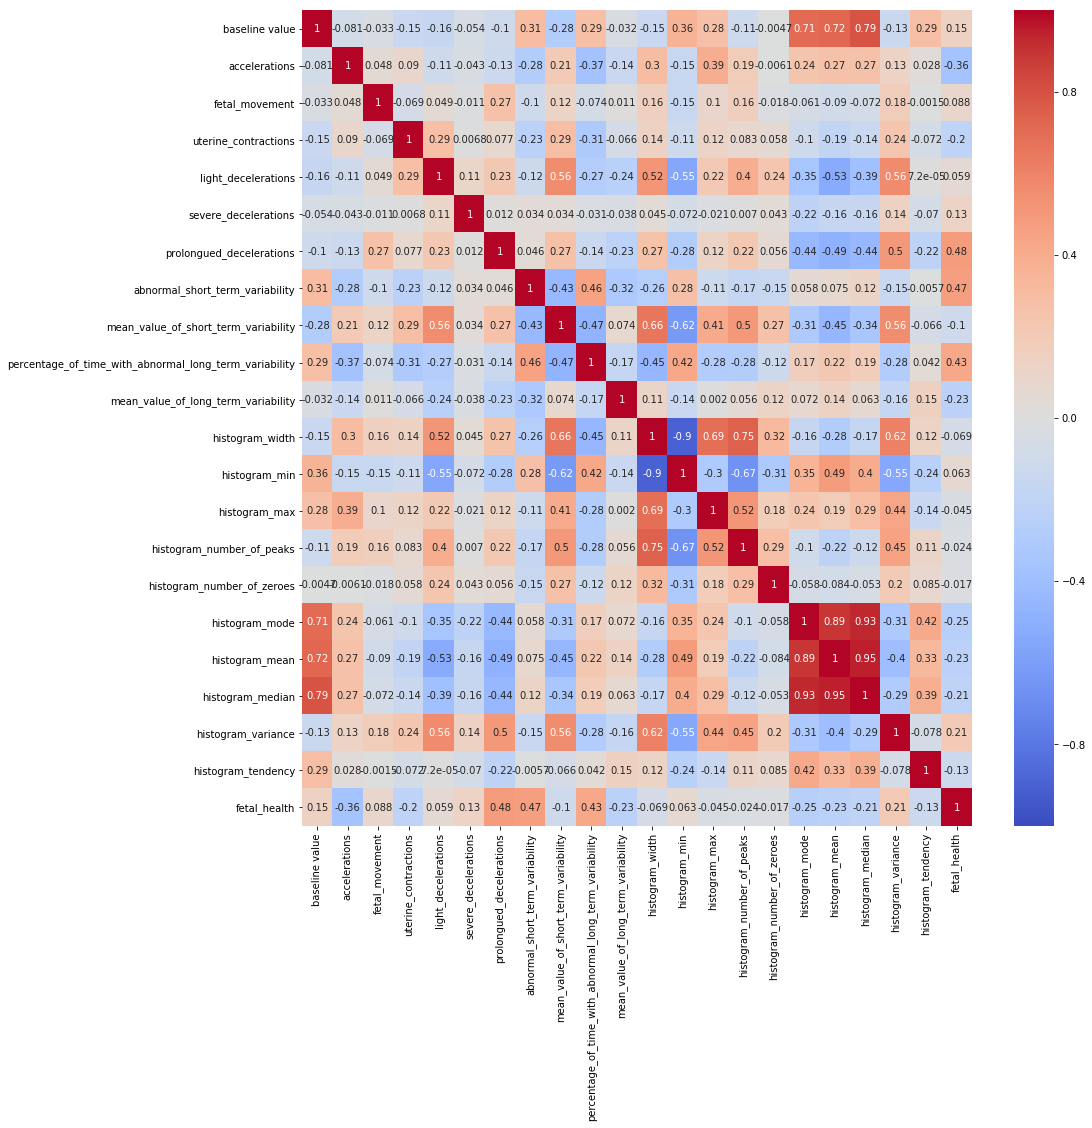

In [4]:
#Correlation of features

corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [5]:
#Correlation of target class 'fetal_health' with all the features

corr['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

In [6]:
#Features having correlation > 10% with target class

corr[abs(corr['fetal_health']) > 0.1]['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
uterine_contractions                                     -0.204894
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
histogram_median                                         -0.205033
histogram_variance                                        0.206630
histogram_tendency                                       -0.131976
fetal_health                                              1.00

In [7]:
x_corr = df[corr[abs(corr['fetal_health']) > 0.1]['fetal_health'].index]
x_corr = (x_corr-x_corr.mean())/x_corr.std()
y = df['fetal_health']

### Classification models

In [8]:
#Spliting data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_corr,y,random_state=1,test_size=0.2)

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
acc_lr_c=accuracy_score(y_test,y_lr)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*acc_lr_c))

Linear Regression Success Rate : 99.06%


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Support Vector Machine

In [10]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)
y_svm=svm.predict(x_test)
acc_svm_c=accuracy_score(y_test,y_svm)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*acc_svm_c))

Support Vector Machine Success Rate : 99.53%


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_dt = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_dt)*100)
acc_dt_c=max(list1)
print("Top Decision Tree Classifier Success Rate:", "{:.2f}%".format(acc_dt_c))

Top Decision Tree Classifier Success Rate: 100.00%


#### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_rfc=rfc.predict(x_test)
acc_rfc_c=accuracy_score(y_test,y_rfc)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*acc_rfc_c))

Random Forest Classifier Success Rate : 99.53%


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Gradient Booster Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_gbc=gbc.predict(x_test)
acc_gbc_c=accuracy_score(y_test,y_gbc)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*acc_gbc_c))

Gradient Booster Classifier Success Rate : 100.00%


### Results

In [14]:
print("Classification model with correlation:\n")
print("Logistic Regression ", acc_lr_c,"\nSupport Vector Machine ", acc_svm_c, "\nDecision Tree Classifier ",acc_dt_c/100, "\nRandom Forest Classifier ",acc_rfc_c, "\nGradient Booster Classifier ", acc_gbc_c)

Classification model with correlation:

Logistic Regression  0.9906103286384976 
Support Vector Machine  0.9953051643192489 
Decision Tree Classifier  1.0 
Random Forest Classifier  0.9953051643192489 
Gradient Booster Classifier  1.0
